In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from google.colab import files


In [2]:
uploaded = files.upload()
mushroom_data = pd.read_csv('mushrooms.csv')
mushroom_data.head()

Saving mushrooms.csv to mushrooms.csv


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroom_data.info

<bound method DataFrame.info of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]>

In [5]:
mushroom_data.dtypes

,0
class,object
cap-shape,object
cap-surface,object
cap-color,object
bruises,object
odor,object
gill-attachment,object
gill-spacing,object
gill-size,object
gill-color,object


In [6]:
mushroom_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
mushroom_data['population'].value_counts()

,count
population,
v,4040
y,1712
s,1248
n,400
a,384
c,340


In [8]:
mushroom_data.isna().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [9]:
mushroom_target = mushroom_data['class']
mushroom_input = mushroom_data.drop(['class'], axis=1)

In [10]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(mushroom_input, mushroom_target, train_size = 0.8, random_state=42, stratify = mushroom_target)

In [11]:
train_target.value_counts()

,count
class,
e,3366
p,3133


In [12]:
test_target.value_counts()

,count
class,
e,842
p,783


In [13]:
ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

In [14]:
train_input_transf = ordinal_encoder.fit_transform(train_input)
test_input_transf = ordinal_encoder.fit_transform(test_input)

train_target_transf = label_encoder.fit_transform(train_target)
test_target_transf = label_encoder.fit_transform(test_target)

In [15]:
train_input_transf

array([[2., 3., 9., ..., 1., 5., 1.],
       [5., 2., 5., ..., 7., 1., 6.],
       [0., 2., 3., ..., 7., 3., 1.],
       ...,
       [2., 0., 8., ..., 2., 0., 1.],
       [5., 0., 3., ..., 3., 5., 0.],
       [2., 0., 4., ..., 3., 4., 0.]])

In [16]:
train_target_transf

array([1, 0, 0, ..., 0, 0, 0])

In [17]:
test_input_transf.dtype

dtype('float64')

In [18]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(train_input_transf)
train_input_rescaled = scaling.transform(train_input_transf)

In [19]:
C = 1.0
svc = svm.SVC(kernel='linear',C=C).fit(train_input_rescaled, train_target_transf)

In [20]:
test_pred_target = svc.predict(scaling.transform(test_input_transf))

In [21]:
test_pred_target

array([1, 1, 0, ..., 0, 0, 0])

In [22]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(train_input_transf)

In [23]:
train_input_rescaled = scaling.transform(train_input_transf)

In [24]:
train_input_rescaled

array([[-0.2       ,  1.        ,  1.        , ..., -0.75      ,
         1.        , -0.66666667],
       [ 1.        ,  0.33333333,  0.11111111, ...,  0.75      ,
        -0.6       ,  1.        ],
       [-1.        ,  0.33333333, -0.33333333, ...,  0.75      ,
         0.2       , -0.66666667],
       ...,
       [-0.2       , -1.        ,  0.77777778, ..., -0.5       ,
        -1.        , -0.66666667],
       [ 1.        , -1.        , -0.33333333, ..., -0.25      ,
         1.        , -1.        ],
       [-0.2       , -1.        , -0.11111111, ..., -0.25      ,
         0.6       , -1.        ]])

In [25]:
scv = svm.SVC(kernel="linear", C=C).fit(train_input_rescaled, train_target_transf)

In [26]:
test_pred_target = scv.predict(scaling.transform(test_input_transf))

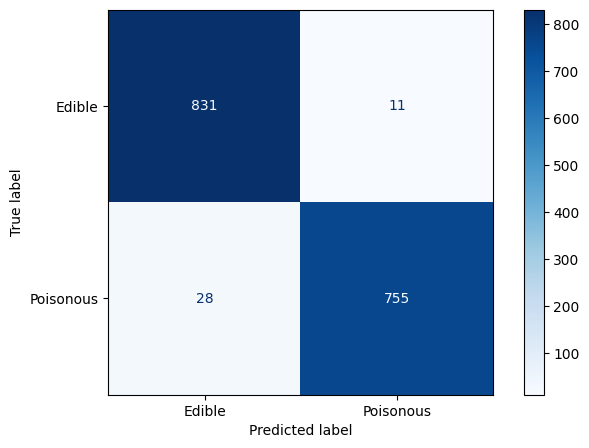

In [27]:
fix, ax = plt.subplots(figsize=(8,5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(test_target_transf, test_pred_target),
    display_labels=["Edible", "Poisonous"])
cmp.plot(ax=ax, cmap='Blues')

In [28]:
print(classification_report(test_target_transf, test_pred_target, target_names=["Edible","Poisonous"]))

              precision    recall  f1-score   support

      Edible       0.97      0.99      0.98       842
   Poisonous       0.99      0.96      0.97       783

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [29]:
C = 1.0
svc = svm.SVC(kernel="linear",C=C).fit(train_input_rescaled, train_target_transf)

In [30]:
y_pred_test = svc.predict(scaling.transform(test_input_transf))

In [31]:
mushroom_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [32]:
parameter_tuned = [
    {"kernel":["linear"], 'C':[1,10]},
    {"kernel":['poly'],'C':[1,10]},
    {"kernel":['rbf'],'gamma':[1e-3,1e-4],'C':[1,10]}
]

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

def tuned(result) :
    means = result['mean_test_score']
    stds = result['std_test_score']
    best_params = result['params'][means.argmax()]

    print('최적의 파라미터 : {}\n'.format(best_params))
    print('평균 테스트 점수 : {}\n'.format(round(means.mean(), 3)))
    print('Std test score: {}'.format(round(stds.mean(),3)))

    for mean, std, params in zip(means, stds, result['params']) :
        print('{} (x-/{}) for {}'.format(round(mean,3), round(std*2,3),params))

gcv = GridSearchCV(svm.SVC(), parameter_tuned, cv=5)
gcv.fit(train_input_rescaled, train_target_transf)
tuned(gcv.cv_results_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


최적의 파라미터 : {'C': 1, 'kernel': 'poly'}

평균 테스트 점수 : 0.952

Std test score: 0.003
0.956 (x-/0.009) for {'C': 1, 'kernel': 'linear'}
0.982 (x-/0.01) for {'C': 10, 'kernel': 'linear'}
1.0 (x-/0.0) for {'C': 1, 'kernel': 'poly'}
1.0 (x-/0.0) for {'C': 10, 'kernel': 'poly'}
0.923 (x-/0.007) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.886 (x-/0.01) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.945 (x-/0.008) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.923 (x-/0.007) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [34]:
from sklearn.metrics import accuracy_score, f1_score

# 최적의 모델 가져오기
best_model = gcv.best_estimator_

# 테스트 데이터 예측
test_predictions = best_model.predict(scaling.transform(test_input_transf))

# 테스트 정확도 확인
test_accuracy = accuracy_score(test_target_transf, test_predictions)
print(f"테스트 데이터 정확도: {test_accuracy:.3f}")

# F1 점수 확인
test_f1_score = f1_score(test_target_transf, test_predictions)
print(f"독버섯 F1 점수: {test_f1_score:.3f}")
test_f1_score_edible = f1_score(test_target_transf, test_predictions, pos_label=0)
print(f"식용버섯 F1 점수: {test_f1_score_edible:.3f}")

테스트 데이터 정확도: 0.998
독버섯 F1 점수: 0.997
식용버섯 F1 점수: 0.998
